<a href="https://colab.research.google.com/github/tripatheea/auto/blob/main/old_autoencoder_better%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

# import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt


from tensorflow.keras.models import Sequential
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K

import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers.embeddings import Embedding
from tensorflow.keras.preprocessing import sequence

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

import seaborn as sns

from tensorflow.keras.layers import add, Activation, LSTM, Conv1D
from tensorflow.keras.layers import MaxPooling1D, UpSampling1D, Cropping1D, SpatialDropout1D, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model

from numpy.random import seed
from tensorflow.random import set_seed


import random

from scipy.signal import welch

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [4]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.110.184.202:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.110.184.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.110.184.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [5]:
seed(10)
set_seed(10)

N = 1000
T = 1 / 500.0

f = 100

h0 = 1e-24

In [6]:
 def make_signal(f, signal=True, noise=False, noise_std=0.1):
    t_s = np.linspace(0, N * T, N)
    
    y_signal = np.sin(2 * np.pi * f * t_s)
    y_noise = np.random.normal(loc=0, scale=noise_std, size=t_s.shape)
    
    y_s = np.zeros(N)
    if signal:
        y_s += y_signal
    if noise:
        y_s += y_noise
        
    return y_s


def plot_signal(t_s, y_s):
    plt.figure(figsize=(5, 2))
    plt.plot(t_s, y_s)

resolution = 100

width = 100
subsampling = 3
n_components = resolution // subsampling

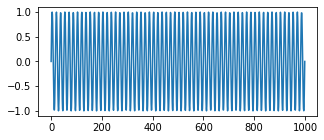

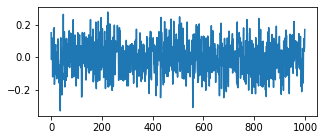

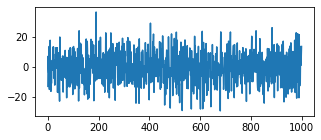

In [7]:
f = 30

y1 = make_signal(f=f, signal=True, noise=False)
plot_signal(np.arange(len(y1)), y1)

y2 = make_signal(f=f, signal=False, noise=True)
plot_signal(np.arange(len(y2)), y2)

y3 = make_signal(f=f, signal=True, noise=True, noise_std=10)
plot_signal(np.arange(len(y3)), y3)

In [8]:
from scipy.fftpack import fft, ifft

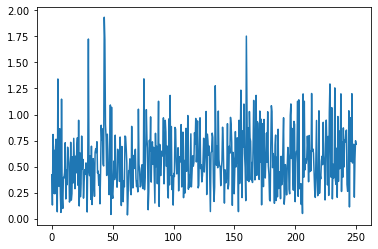

In [9]:
yf = fft(y3)

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()

In [10]:
def calculate_ex2(y):
    return sum([i**2 for i in y]) / len(y)

def calculate_snr(noise_std, f=10, N=100, T=1/800):
    t = np.linspace(0, N * T, N)
    y_sig = np.sin(2 * np.pi * f * t)
    y_noise = np.random.normal(loc=0, scale=noise_std, size=t.shape)
    
    y = y_sig + y_noise

    sn_var = np.std(y_sig) / np.sqrt(calculate_ex2(y_noise))
    
    return sn_var, 10 * np.log10(sn_var)


def get_sensitivity_depth(h0, y_noise):
    
    freq_psd, power_data = welch(y_noise, fs=int(1/T), nfft=int(1/T))

    S_n = get_sqrt_S(y_noise)**2

    sqrt_S = np.sqrt(S_n)
    
    return sqrt_S / h0

In [11]:
lower_f, upper_f = 20, 25
# noise_lower, noise_upper = 2, 5

noise_std_lower, noise_std_upper = 3, 3.5

print( calculate_snr(noise_std=noise_std_lower, f=23, N=N, T=T) )
print( calculate_snr(noise_std=noise_std_upper, f=23, N=N, T=T) )

(0.2315818991917805, -6.3529538876298215)
(0.20143437737850325, -6.958664094938053)


In [12]:
def get_sqrt_S(y_noise):
    freq_psd, power_data = welch(y_noise, fs=int(1/T), nfft=int(1/T))
    return np.sqrt( np.average(power_data) )

(0.0, 1000.0)

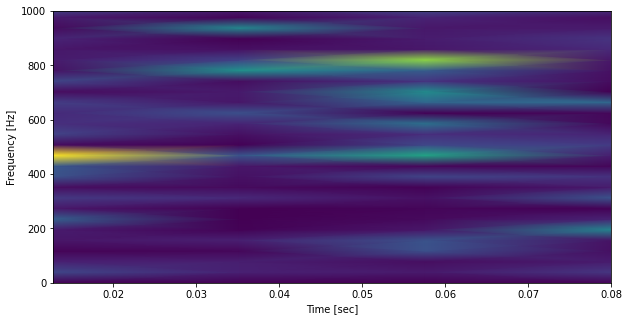

In [13]:
from scipy.signal import spectrogram

y = make_signal(f=23, signal=True, noise=True, noise_std=noise_std_upper)

plt.figure(figsize=(10, 5))

f, t, Sxx = spectrogram(y, fs=10e3)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 1000)

In [14]:
train_size = 3000


random.seed(10)

test_size = int(train_size  * 0.1)

f_s = []
all_data_raw = []
noises = []
labels = []

for i in range(train_size):
    f = random.uniform(lower_f, upper_f)
    
    # 0 = Signal; 1 = Noise; 2 = Signal + Noise.
    
#     signal = random.choices(population=[0, 1, 2], weights=[0.45, 0.1, 0.45])[0]
#     signal = random.choices(population=[0], weights=[1.0])[0]

    signal = random.choices(population=[2, 1], weights=[0.5, 0.5])[0]
#     if i == 0:
#         signal = 0
#     elif i == 1:
#         signal = 1
    
    noise_std = random.uniform(noise_std_lower, noise_std_upper)
    
    if signal == 0:
        current_y = make_signal(f=f, signal=True, noise=False, noise_std=noise_std)
    elif signal == 1:
        current_y = make_signal(f=f, signal=False, noise=True, noise_std=noise_std)
    elif signal == 2:
        current_y = make_signal(f=f, signal=True, noise=True, noise_std=noise_std)
    
    
    
    y_fft = fft(current_y)
    
    current_y = [[x.real, x.imag, f] for x in y_fft]

#     current_y = [[x] for x in current_y]
#     freqs = [[f] * len(current_y)]
    
    if signal == 0 or signal == 2:
        was_signal_there = 1
    elif signal == 1:
        was_signal_there = 0
        
    f_s.append(f)
#     noises.append(noise_amp)
    
#     current_y = np.append(current_y, int(signal))
    labels.append([int(was_signal_there)])
    all_data_raw.append(current_y)

In [15]:
np.array(all_data_raw).shape

(3000, 1000, 3)

In [16]:
print(np.array(all_data_raw).shape)

print(np.array(all_data_raw[train_size - test_size:]).shape)

(3000, 1000, 3)
(300, 1000, 3)


In [17]:
np.array(all_data_raw).shape

(3000, 1000, 3)

In [18]:
x_train = np.array(all_data_raw[:train_size - test_size])
y_train = np.array(labels[:train_size - test_size])

x_train.shape, y_train.shape

((2700, 1000, 3), (2700, 1))

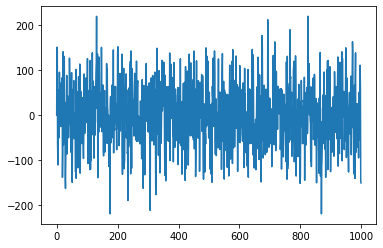

In [19]:
plt.plot(x_train[15][:,1])

In [20]:
x_test = np.array(all_data_raw[train_size - test_size:])
y_test = np.array(labels[train_size - test_size:])

x_test.shape, y_test.shape

((300, 1000, 3), (300, 1))

In [21]:
y_train.flatten()

array([1, 0, 1, ..., 0, 0, 0])

In [22]:
class LayerNormalization(tf.keras.layers.Layer):
    
    """ 
    
    Layer normalization layer modified from https://github.com/CyberZHG based on [Layer Normalization](https://arxiv.org/pdf/1607.06450.pdf)
    
    Parameters
    ----------
    center: bool
        Add an offset parameter if it is True. 
        
    scale: bool
        Add a scale parameter if it is True.     
        
    epsilon: bool
        Epsilon for calculating variance.     
        
    gamma_initializer: str
        Initializer for the gamma weight.     
        
    beta_initializer: str
        Initializer for the beta weight.     
                    
    Returns
    -------  
    data: 3D tensor
        with shape: (batch_size, …, input_dim) 
            
    """   
              
    def __init__(self,
                 center=True,
                 scale=True,
                 epsilon=None,
                 gamma_initializer='ones',
                 beta_initializer='zeros',
                 **kwargs):

        super(LayerNormalization, self).__init__(**kwargs)
        self.supports_masking = True
        self.center = center
        self.scale = scale
        if epsilon is None:
            epsilon = K.epsilon() * K.epsilon()
        self.epsilon = epsilon
        self.gamma_initializer = tf.keras.initializers.get(gamma_initializer)
        self.beta_initializer = tf.keras.initializers.get(beta_initializer)
      

    def get_config(self):
        config = {
            'center': self.center,
            'scale': self.scale,
            'epsilon': self.epsilon,
            'gamma_initializer': tf.keras.initializers.serialize(self.gamma_initializer),
            'beta_initializer': tf.keras.initializers.serialize(self.beta_initializer),
        }
        base_config = super(LayerNormalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

    def compute_mask(self, inputs, input_mask=None):
        return input_mask

    def build(self, input_shape):
        self.input_spec = tf.keras.engine.InputSpec(shape=input_shape)
        shape = input_shape[-1:]
        if self.scale:
            self.gamma = self.add_weight(
                shape=shape,
                initializer=self.gamma_initializer,
                name='gamma',
            )
        if self.center:
            self.beta = self.add_weight(
                shape=shape,
                initializer=self.beta_initializer,
                name='beta',
            )
        super(LayerNormalization, self).build(input_shape)

    def call(self, inputs, training=None):
        mean = K.mean(inputs, axis=-1, keepdims=True)
        variance = K.mean(K.square(inputs - mean), axis=-1, keepdims=True)
        std = K.sqrt(variance + self.epsilon)
        outputs = (inputs - mean) / std
        if self.scale:
            outputs *= self.gamma
        if self.center:
            outputs += self.beta
        return outputs

    
class FeedForward(tf.keras.layers.Layer):
    """Position-wise feed-forward layer. modified from https://github.com/CyberZHG 
    # Arguments
        units: int >= 0. Dimension of hidden units.
        activation: Activation function to use
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix.
        bias_initializer: Initializer for the bias vector.
        dropout_rate: 0.0 <= float <= 1.0. Dropout rate for hidden units.
    # Input shape
        3D tensor with shape: `(batch_size, ..., input_dim)`.
    # Output shape
        3D tensor with shape: `(batch_size, ..., input_dim)`.
    # References
        - [Attention is All You Need](https://arxiv.org/pdf/1706.03762.pdf)
    """
    
    def __init__(self,
                 units,
                 activation='relu',
                 use_bias=True,
                 kernel_initializer='glorot_normal',
                 bias_initializer='zeros',
                 dropout_rate=0.0,
                 **kwargs):
        self.supports_masking = True
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = tf.keras.initializers.get(kernel_initializer)
        self.bias_initializer = tf.keras.initializers.get(bias_initializer)
        self.dropout_rate = dropout_rate
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        super(FeedForward, self).__init__(**kwargs)

    def get_config(self):
        config = {
            'units': self.units,
            'activation': tf.keras.activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': tf.keras.initializers.serialize(self.kernel_initializer),
            'bias_initializer': tf.keras.initializers.serialize(self.bias_initializer),
            'dropout_rate': self.dropout_rate,
        }
        base_config = super(FeedForward, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

    def compute_mask(self, inputs, input_mask=None):
        return input_mask

    def build(self, input_shape):
        feature_dim = int(input_shape[-1])
        self.W1 = self.add_weight(
            shape=(feature_dim, self.units),
            initializer=self.kernel_initializer,
            name='{}_W1'.format(self.name),
        )
        if self.use_bias:
            self.b1 = self.add_weight(
                shape=(self.units,),
                initializer=self.bias_initializer,
                name='{}_b1'.format(self.name),
            )
        self.W2 = self.add_weight(
            shape=(self.units, feature_dim),
            initializer=self.kernel_initializer,
            name='{}_W2'.format(self.name),
        )
        if self.use_bias:
            self.b2 = self.add_weight(
                shape=(feature_dim,),
                initializer=self.bias_initializer,
                name='{}_b2'.format(self.name),
            )
        super(FeedForward, self).build(input_shape)

    def call(self, x, mask=None, training=None):
        h = K.dot(x, self.W1)
        if self.use_bias:
            h = K.bias_add(h, self.b1)
        if self.activation is not None:
            h = self.activation(h)
        if 0.0 < self.dropout_rate < 1.0:
            def dropped_inputs():
                return K.dropout(h, self.dropout_rate, K.shape(h))
            h = K.in_train_phase(dropped_inputs, h, training=training)
        y = K.dot(h, self.W2)
        if self.use_bias:
            y = K.bias_add(y, self.b2)
        return y

    
    
    

class SeqSelfAttention(tf.keras.layers.Layer):
    """Layer initialization. modified from https://github.com/CyberZHG
    For additive attention, see: https://arxiv.org/pdf/1806.01264.pdf
    :param units: The dimension of the vectors that used to calculate the attention weights.
    :param attention_width: The width of local attention.
    :param attention_type: 'additive' or 'multiplicative'.
    :param return_attention: Whether to return the attention weights for visualization.
    :param history_only: Only use historical pieces of data.
    :param kernel_initializer: The initializer for weight matrices.
    :param bias_initializer: The initializer for biases.
    :param kernel_regularizer: The regularization for weight matrices.
    :param bias_regularizer: The regularization for biases.
    :param kernel_constraint: The constraint for weight matrices.
    :param bias_constraint: The constraint for biases.
    :param use_additive_bias: Whether to use bias while calculating the relevance of inputs features
                              in additive mode.
    :param use_attention_bias: Whether to use bias while calculating the weights of attention.
    :param attention_activation: The activation used for calculating the weights of attention.
    :param attention_regularizer_weight: The weights of attention regularizer.
    :param kwargs: Parameters for parent class.
    """
        
    ATTENTION_TYPE_ADD = 'additive'
    ATTENTION_TYPE_MUL = 'multiplicative'

    def __init__(self,
                 units=32,
                 attention_width=None,
                 attention_type=ATTENTION_TYPE_ADD,
                 return_attention=False,
                 history_only=False,
                 kernel_initializer='glorot_normal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 use_additive_bias=True,
                 use_attention_bias=True,
                 attention_activation=None,
                 attention_regularizer_weight=0.0,
                 **kwargs):

        super(SeqSelfAttention, self).__init__(**kwargs)
        self.supports_masking = True
        self.units = units
        self.attention_width = attention_width
        self.attention_type = attention_type
        self.return_attention = return_attention
        self.history_only = history_only
        if history_only and attention_width is None:
            self.attention_width = int(1e9)

        self.use_additive_bias = use_additive_bias
        self.use_attention_bias = use_attention_bias
        self.kernel_initializer = tf.keras.initializers.get(kernel_initializer)
        self.bias_initializer = tf.keras.initializers.get(bias_initializer)
        self.kernel_regularizer = tf.keras.regularizers.get(kernel_regularizer)
        self.bias_regularizer = tf.keras.regularizers.get(bias_regularizer)
        self.kernel_constraint = tf.keras.constraints.get(kernel_constraint)
        self.bias_constraint = tf.keras.constraints.get(bias_constraint)
        self.attention_activation = tf.keras.activations.get(attention_activation)
        self.attention_regularizer_weight = attention_regularizer_weight
        self._backend = keras.backend.backend()

        if attention_type == SeqSelfAttention.ATTENTION_TYPE_ADD:
            self.Wx, self.Wt, self.bh = None, None, None
            self.Wa, self.ba = None, None
        elif attention_type == SeqSelfAttention.ATTENTION_TYPE_MUL:
            self.Wa, self.ba = None, None
        else:
            raise NotImplementedError('No implementation for attention type : ' + attention_type)

    def get_config(self):
        config = {
            'units': self.units,
            'attention_width': self.attention_width,
            'attention_type': self.attention_type,
            'return_attention': self.return_attention,
            'history_only': self.history_only,
            'use_additive_bias': self.use_additive_bias,
            'use_attention_bias': self.use_attention_bias,
            'kernel_initializer': tf.keras.regularizers.serialize(self.kernel_initializer),
            'bias_initializer': tf.keras.regularizers.serialize(self.bias_initializer),
            'kernel_regularizer': tf.keras.regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': tf.keras.regularizers.serialize(self.bias_regularizer),
            'kernel_constraint': tf.keras.constraints.serialize(self.kernel_constraint),
            'bias_constraint': tf.keras.constraints.serialize(self.bias_constraint),
            'attention_activation': tf.keras.activations.serialize(self.attention_activation),
            'attention_regularizer_weight': self.attention_regularizer_weight,
        }
        base_config = super(SeqSelfAttention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def build(self, input_shape):
        if self.attention_type == SeqSelfAttention.ATTENTION_TYPE_ADD:
            self._build_additive_attention(input_shape)
        elif self.attention_type == SeqSelfAttention.ATTENTION_TYPE_MUL:
            self._build_multiplicative_attention(input_shape)
        super(SeqSelfAttention, self).build(input_shape)

    def _build_additive_attention(self, input_shape):
        feature_dim = int(input_shape[2])

        self.Wt = self.add_weight(shape=(feature_dim, self.units),
                                  name='{}_Add_Wt'.format(self.name),
                                  initializer=self.kernel_initializer,
                                  regularizer=self.kernel_regularizer,
                                  constraint=self.kernel_constraint)
        self.Wx = self.add_weight(shape=(feature_dim, self.units),
                                  name='{}_Add_Wx'.format(self.name),
                                  initializer=self.kernel_initializer,
                                  regularizer=self.kernel_regularizer,
                                  constraint=self.kernel_constraint)
        if self.use_additive_bias:
            self.bh = self.add_weight(shape=(self.units,),
                                      name='{}_Add_bh'.format(self.name),
                                      initializer=self.bias_initializer,
                                      regularizer=self.bias_regularizer,
                                      constraint=self.bias_constraint)

        self.Wa = self.add_weight(shape=(self.units, 1),
                                  name='{}_Add_Wa'.format(self.name),
                                  initializer=self.kernel_initializer,
                                  regularizer=self.kernel_regularizer,
                                  constraint=self.kernel_constraint)
        if self.use_attention_bias:
            self.ba = self.add_weight(shape=(1,),
                                      name='{}_Add_ba'.format(self.name),
                                      initializer=self.bias_initializer,
                                      regularizer=self.bias_regularizer,
                                      constraint=self.bias_constraint)

    def _build_multiplicative_attention(self, input_shape):
        feature_dim = int(input_shape[2])

        self.Wa = self.add_weight(shape=(feature_dim, feature_dim),
                                  name='{}_Mul_Wa'.format(self.name),
                                  initializer=self.kernel_initializer,
                                  regularizer=self.kernel_regularizer,
                                  constraint=self.kernel_constraint)
        if self.use_attention_bias:
            self.ba = self.add_weight(shape=(1,),
                                      name='{}_Mul_ba'.format(self.name),
                                      initializer=self.bias_initializer,
                                      regularizer=self.bias_regularizer,
                                      constraint=self.bias_constraint)

    def call(self, inputs, mask=None, **kwargs):
        input_len = K.shape(inputs)[1]

        if self.attention_type == SeqSelfAttention.ATTENTION_TYPE_ADD:
            e = self._call_additive_emission(inputs)
        elif self.attention_type == SeqSelfAttention.ATTENTION_TYPE_MUL:
            e = self._call_multiplicative_emission(inputs)

        if self.attention_activation is not None:
            e = self.attention_activation(e)
        e = K.exp(e - K.max(e, axis=-1, keepdims=True))
        if self.attention_width is not None:
            if self.history_only:
                lower = K.arange(0, input_len) - (self.attention_width - 1)
            else:
                lower = K.arange(0, input_len) - self.attention_width // 2
            lower = K.expand_dims(lower, axis=-1)
            upper = lower + self.attention_width
            indices = K.expand_dims(K.arange(0, input_len), axis=0)
            e = e * K.cast(lower <= indices, K.floatx()) * K.cast(indices < upper, K.floatx())
        if mask is not None:
            mask = K.cast(mask, K.floatx())
            mask = K.expand_dims(mask)
            e = K.permute_dimensions(K.permute_dimensions(e * mask, (0, 2, 1)) * mask, (0, 2, 1))

        # a_{t} = \text{softmax}(e_t)
        s = K.sum(e, axis=-1, keepdims=True)
        a = e / (s + K.epsilon())

        # l_t = \sum_{t'} a_{t, t'} x_{t'}
        v = K.batch_dot(a, inputs)
        if self.attention_regularizer_weight > 0.0:
            self.add_loss(self._attention_regularizer(a))

        if self.return_attention:
            return [v, a]
        return v

    def _call_additive_emission(self, inputs):
        input_shape = K.shape(inputs)
        batch_size, input_len = input_shape[0], input_shape[1]

        # h_{t, t'} = \tanh(x_t^T W_t + x_{t'}^T W_x + b_h)
        q = K.expand_dims(K.dot(inputs, self.Wt), 2)
        k = K.expand_dims(K.dot(inputs, self.Wx), 1)
        if self.use_additive_bias:
            h = K.tanh(q + k + self.bh)
        else:
            h = K.tanh(q + k)

        # e_{t, t'} = W_a h_{t, t'} + b_a
        if self.use_attention_bias:
            e = K.reshape(K.dot(h, self.Wa) + self.ba, (batch_size, input_len, input_len))
        else:
            e = K.reshape(K.dot(h, self.Wa), (batch_size, input_len, input_len))
        return e

    def _call_multiplicative_emission(self, inputs):
        # e_{t, t'} = x_t^T W_a x_{t'} + b_a
        e = K.batch_dot(K.dot(inputs, self.Wa), K.permute_dimensions(inputs, (0, 2, 1)))
        if self.use_attention_bias:
            e += self.ba[0]
        return e

    def compute_output_shape(self, input_shape):
        output_shape = input_shape
        if self.return_attention:
            attention_shape = (input_shape[0], output_shape[1], input_shape[1])
            return [output_shape, attention_shape]
        return output_shape

    def compute_mask(self, inputs, mask=None):
        if self.return_attention:
            return [mask, None]
        return mask

    def _attention_regularizer(self, attention):
        batch_size = K.cast(K.shape(attention)[0], K.floatx())
        input_len = K.shape(attention)[-1]
        indices = K.expand_dims(K.arange(0, input_len), axis=0)
        diagonal = K.expand_dims(K.arange(0, input_len), axis=-1)
        eye = K.cast(K.equal(indices, diagonal), K.floatx())
        return self.attention_regularizer_weight * K.sum(K.square(K.batch_dot(
            attention,
            K.permute_dimensions(attention, (0, 2, 1))) - eye)) / batch_size

    @staticmethod
    def get_custom_objects():
        return {'SeqSelfAttention': SeqSelfAttention}

def f1(y_true, y_pred):
    
    """ 
    
    Calculate F1-score.
    
    Parameters
    ----------
    y_true : 1D array
        Ground truth labels. 
        
    y_pred : 1D array
        Predicted labels.     
        
    Returns
    -------  
    f1 : float
        Calculated F1-score. 
        
    """     
    
    def recall(y_true, y_pred):
        'Recall metric. Only computes a batch-wise average of recall. Computes the recall, a metric for multi-label classification of how many relevant items are selected.'

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        'Precision metric. Only computes a batch-wise average of precision. Computes the precision, a metric for multi-label classification of how many selected items are relevant.'

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



def _block_BiLSTM(filters, drop_rate, padding, inpR, regularizer):
    'Returns LSTM residual block'    
    prev = inpR
    x_rnn = Bidirectional(LSTM(filters, 
                               return_sequences=True, 
                               dropout=drop_rate, 
                               recurrent_dropout=drop_rate,
                               kernel_regularizer=regularizer, 
                               recurrent_regularizer=regularizer, 
                               bias_regularizer=regularizer,
                               activity_regularizer=regularizer
                              ))(prev)
    
    NiN = Conv1D(filters, 1, padding = padding, kernel_regularizer = regularizer, bias_regularizer = regularizer,)(x_rnn)     
    res_out = BatchNormalization()(NiN)
    return res_out


def _block_CNN_1(filters, ker, drop_rate, activation, padding, inpC, regularizer): 
    ' Returns CNN residual blocks '
    prev = inpC
    layer_1 = BatchNormalization()(prev) 
    act_1 = Activation(activation)(layer_1) 
    act_1 = SpatialDropout1D(drop_rate)(act_1, training=True)
    conv_1 = Conv1D(filters, ker, padding = padding, kernel_regularizer = regularizer, bias_regularizer = regularizer)(act_1) 
    
    layer_2 = BatchNormalization()(conv_1) 
    act_2 = Activation(activation)(layer_2) 
    act_2 = SpatialDropout1D(drop_rate)(act_2, training=True)
    conv_2 = Conv1D(filters, ker, padding = padding, kernel_regularizer = regularizer, bias_regularizer = regularizer)(act_2)
    
    res_out = add([prev, conv_2])
    
    return res_out 


def _transformer(drop_rate, width, name, inpC, regularizer): 
    ' Returns a transformer block containing one addetive attention and one feed  forward layer with residual connections '
    x = inpC
    
    att_layer, weight = SeqSelfAttention(return_attention =True,                                       
                                         attention_width = width,
                                         name=name)(x)
   
#  att_layer = Dropout(drop_rate)(att_layer, training=True)    
    att_layer2 = add([x, att_layer])    
    norm_layer = LayerNormalization()(att_layer2)
    
    FF = FeedForward(units=16, dropout_rate=drop_rate)(norm_layer) # Was 128.
    
    FF_add = add([norm_layer, FF])    
    norm_out = LayerNormalization()(FF_add)
    
    return norm_out, weight 




In [23]:
# ker_regul = keras.regularizers.l2(1e-10)
# bias_regul = keras.regularizers.l2(1e-10)

ker_regul = tf.keras.regularizers.l2(1e-50)
bias_regul = tf.keras.regularizers.l2(1e-50)


# 5e-2 This works well when noise = [1, 1.5]

dropout_rate = 0.00

# m = 2
# n = 2

m = 9
n = 9


def autoencoder_model(X, attention=False):
    inputs = tf.keras.layers.Input(shape=(X.shape[1], X.shape[2]))
    
    e = Conv1D( m, 
                [n], 
                activation = 'relu',
                padding='causal',
                kernel_regularizer = ker_regul,
                bias_regularizer = bias_regul,
                )(inputs)             
    
    e = MaxPooling1D(2, padding='same')(e)      
    
    
    
#     layer_1 = BatchNormalization()(e) 
#     act_1 = Activation('relu')(layer_1) 
#     act_1 = SpatialDropout1D(dropout_rate)(act_1, training=True)
#     e = Conv1D(15, 9, padding='causal', kernel_regularizer = ker_regul, bias_regularizer = bias_regul,)(act_1) 
    
#     e = _block_BiLSTM(1, dropout_rate, 'causal', e, ker_regul)
    e = _block_BiLSTM(5, dropout_rate, 'causal', e, ker_regul) # Remove
    
    
    if attention:
        x, weightdD0 = _transformer(dropout_rate, None, 'attentionD0', e, ker_regul)
        encoded, weightdD = _transformer(dropout_rate, None, 'attentionD', x, ker_regul)
        e = encoded
    
    # Decoder
#     e = UpSampling1D(2)(e)    # Remove

    e = UpSampling1D(8)(e)
    e = Conv1D(m, 
               [n], 
               padding = 'causal', 
               activation = 'relu',
               kernel_regularizer = ker_regul, 
               bias_regularizer = bias_regul
               )(e)

    # Decoder done.
    
#     e = Conv1D(11, 9, padding='causal', activation='relu', name='detector',
#                    kernel_regularizer = ker_regul, 
#                    bias_regularizer = bias_regul)(e)
    
    e = Flatten()(e)
    
    e = Dense(32)(e) # Remove
    e = Dense(16)(e) # Remove
    e = Dense(8)(e) # Remove
    e = Dense(2)(e)
    e = Dense(1, activation='sigmoid')(e)
    
    model = Model(inputs=inputs, outputs=e)
    
    return model

In [24]:
X_tensor = tf.convert_to_tensor(x_train)
Y_tensor = tf.convert_to_tensor(y_train)

X_tensor.shape, Y_tensor.shape

(TensorShape([2700, 1000, 3]), TensorShape([2700, 1]))

In [32]:
attention = False

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  # model = create_model()
  model = autoencoder_model(x_train, attention=attention)

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000, 3)]         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1000, 9)           252       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 9)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 10)           600       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 5)            55        
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 5)            20        
_________________________________________________________________
up_sampling1d_1 (UpSampling1 (None, 4000, 5)           0   

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000, 3)]         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1000, 9)           252       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 9)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 10)           600       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 5)            55        
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 5)            20        
_________________________________________________________________
up_sampling1d_1 (UpSampling1 (None, 4000, 5)           0   

In [36]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=[f1]) 

In [37]:
 EPOCH = 100

validation = False

x_train = X_tensor
y_train_binary = Y_tensor 


# batch_size=16,
with tpu_strategy.scope():
  history = model.fit(x_train,
                      y_train_binary,
                      epochs=EPOCH,
                      validation_split=0.3)

Epoch 1/100
60/60 [==============================] - 70s 689ms/step - loss: nan - f1: 0.3685 - val_loss: nan - val_f1: 0.6023
Epoch 2/100
60/60 [==============================] - 6s 104ms/step - loss: nan - f1: 0.5510 - val_loss: nan - val_f1: 0.5861
Epoch 3/100
60/60 [==============================] - 6s 105ms/step - loss: nan - f1: 0.6682 - val_loss: nan - val_f1: 0.6516
Epoch 4/100
60/60 [==============================] - 6s 104ms/step - loss: nan - f1: 0.7657 - val_loss: nan - val_f1: 0.6371
Epoch 5/100
60/60 [==============================] - 6s 105ms/step - loss: nan - f1: 0.8217 - val_loss: nan - val_f1: 0.7594
Epoch 6/100
60/60 [==============================] - 6s 106ms/step - loss: nan - f1: 0.8659 - val_loss: nan - val_f1: 0.7471
Epoch 7/100
60/60 [==============================] - 6s 106ms/step - loss: nan - f1: 0.8666 - val_loss: nan - val_f1: 0.7874
Epoch 8/100
60/60 [==============================] - 6s 105ms/step - loss: nan - f1: 0.8931 - val_loss: nan - val_f1: 0.7934

In [38]:
tpu_strategy.num_replicas_in_sync

8

In [39]:
EPOCH = 100

In [40]:
# start_lr = 0.001
# min_lr = 0.001
# max_lr = 0.005 * tpu_strategy.num_replicas_in_sync
# rampup_epochs = 25
# sustain_epochs = 10
# exp_decay = .8

# def lrfn(epoch):
#   if epoch < rampup_epochs:
#     return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
#   elif epoch < rampup_epochs + sustain_epochs:
#     return max_lr
#   else:
#     return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
    
# lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True)

# rang = np.arange(EPOCH)
# y = [lrfn(x) for x in rang]
# plt.plot(rang, y)
# print('Learning rate per epoch:')

In [41]:
# from tensorflow.keras import optimizers
from keras.optimizers import Adam

In [42]:


# validation = False

# # with tf.device('/device:GPU:0'):

# batch_size = 32 * tpu_strategy.num_replicas_in_sync
# train_steps = len(X_tensor) // batch_size


# x_train = X_tensor
# y_train_binary = Y_tensor 

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
# # tf.keras.backend.clear_session()

# # optimizer='adam', 

# with tpu_strategy.scope():
#   # batch_size=16,
#   model.compile(loss="binary_crossentropy", 
#                 optimizer=Adam(learning_rate=0.01), 
#                 metrics=[f1],
#                 steps_per_execution=50,) 
#   # model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01)) 

# # callbacks=[lr_callback],
# history = model.fit(x_train,
#                     y_train_binary,
#                     epochs=EPOCH,
#                     validation_split=0.3,
#                     callbacks=[callback],
#                     batch_size=batch_size,)

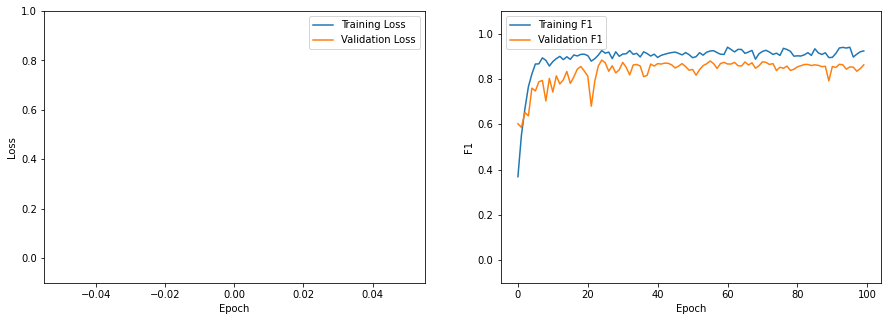

In [43]:
validation = True

current_index = 1

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(history.history['loss'], label="Training Loss")

if validation:
    plt.plot(history.history['val_loss'], label="Validation Loss")
    
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.ylim(-0.1, 1)

plt.subplot(122)
plt.plot(history.history['f1'], label="Training F1")

if validation:
    plt.plot(history.history['val_f1'], label="Validation F1")
    
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.ylim(-0.1, 1.1)
plt.legend()

# plt.savefig("log_plots/{}.jpg".format(current_index))

In [75]:
probs = model(x_train).numpy()

# print(probs.flatten())

# print(y_train.flatten())

In [76]:
thres = 0.5

In [77]:
sum([x >= thres for x in probs.flatten()]), sum([x < 0.5 for x in probs.flatten()])

(1392, 1308)

In [78]:
import sklearn.metrics as metrics
from bisect import bisect_left

In [79]:
preds = [int(x > thres) for x in probs]

In [80]:
fpr, tpr, threshold = metrics.roc_curve(y_train.flatten(), probs)

tpr

array([0.        , 0.67083027, 0.67597355, 0.67817781, 0.69654666,
       0.70022043, 0.71271124, 0.71932403, 0.72814107, 0.72961058,
       0.73328435, 0.73475386, 0.73916238, 0.73989713, 0.74430566,
       0.7531227 , 0.75385746, 0.75679647, 0.761205  , 0.7626745 ,
       0.76340926, 0.76561352, 0.76928729, 0.7707568 , 0.77369581,
       0.77443057, 0.77663483, 0.77736958, 0.77957384, 0.7803086 ,
       0.78251286, 0.78398237, 0.78545187, 0.78618663, 0.78618663,
       0.78692138, 0.7898604 , 0.79059515, 0.79206466, 0.79573843,
       0.79794269, 0.79867744, 0.80014695, 0.8008817 , 0.80308597,
       0.80382072, 0.80529023, 0.80675974, 0.80822924, 0.808964  ,
       0.8104335 , 0.81410727, 0.81631154, 0.82292432, 0.82439383,
       0.83468038, 0.83614989, 0.84055841, 0.84276267, 0.90815577,
       0.90815577, 0.92505511, 0.92505511, 0.92799412, 0.92799412,
       0.94121969, 0.94121969, 0.9426892 , 0.9426892 , 0.94415871,
       0.94415871, 0.94709772, 0.94709772, 0.95003674, 0.95003

In [81]:
train_roc_auc = metrics.auc(fpr, tpr)
train_roc_auc

0.9977175439357017

In [82]:
train_accu = metrics.accuracy_score(y_train.flatten(), preds)

train_accu

0.9803703703703703

In [83]:
probs = model(x_test).numpy()

# print(probs.flatten())

# print(y_test.flatten())

In [84]:
sum([x >= thres for x in probs.flatten()]), sum([x < 0.5 for x in probs.flatten()])

(162, 138)

In [85]:
preds = [int(x > thres) for x in probs.flatten()]

In [86]:
test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test.flatten(), probs)

test_tpr

array([0.        , 0.64666667, 0.66      , 0.67333333, 0.7       ,
       0.71333333, 0.72      , 0.73333333, 0.76      , 0.76      ,
       0.86      , 0.86      , 0.92666667, 0.92666667, 0.94666667,
       0.94666667, 0.98666667, 0.98666667, 1.        , 1.        ])

In [87]:
test_roc_auc = metrics.auc(test_fpr, test_tpr)
test_roc_auc

0.9918444444444445

In [88]:
test_accu = metrics.accuracy_score(y_test.flatten(), preds)

test_accu

0.96

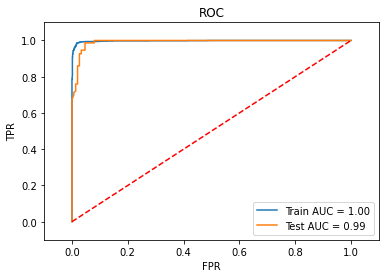

In [89]:
plt.title('ROC')

plt.plot(fpr, tpr, label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, label = 'Test AUC = %0.2f' % test_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [90]:
print("Kernel = ", ker_regul.l2)
print("Bias = ", bias_regul.l2)
print("Dropout = ", dropout_rate)
print("Train AUC = ", train_roc_auc)
print("Train Accu = ", train_accu)
print("Test ROC = ", test_roc_auc)
print("Test Accu = ", test_accu)

Kernel =  0.0
Bias =  0.0
Dropout =  0.0
Train AUC =  0.9977175439357017
Train Accu =  0.9803703703703703
Test ROC =  0.9918444444444445
Test Accu =  0.96


In [91]:
df = pd.DataFrame({'fpr': test_fpr, 'tpr': test_tpr, 'threshold': test_threshold})
one_percent_fpr_idx = bisect_left(df['fpr'].values, 0.01)

row = df.iloc[one_percent_fpr_idx]
    
detection_probability = row['tpr']

In [92]:
detection_probability

0.72

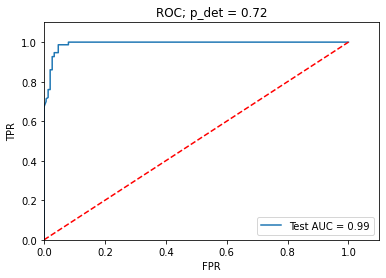

In [93]:
plt.title('ROC; p_det = ' + str(detection_probability))

plt.plot(test_fpr, test_tpr, label = 'Test AUC = %0.2f' % test_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0., 1.1])
plt.ylim([-0., 1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [63]:
from scipy.signal import welch

In [94]:
random.seed(42)

scaling = 1e-23

def generate_test_data(test_size, lower_f, upper_f, h0_lower, h0_upper):

    # snr_s = []
    f_s = []
    all_data_raw = []
    h0_s = []
    labels = []
    sqrt_S_s = []
    rho_s = []

    for i in range(test_size):
      f = random.uniform(lower_f, upper_f)
      
      # 0 = Signal; 1 = Noise; 2 = Signal + Noise.
      
  #     signal = random.choices(population=[0, 1, 2], weights=[0.45, 0.1, 0.45])[0]
  #     signal = random.choices(population=[0], weights=[1.0])[0]

      signal = random.choices(population=[2, 1], weights=[0.5, 0.5])[0]
  #     if i == 0:
  #         signal = 0
  #     elif i == 1:
  #         signal = 1
      
      noise_std = random.uniform(noise_std_lower, noise_std_upper)
      
      if signal == 0:
          current_y = make_signal(f=f, signal=True, noise=False, noise_std=noise_std)
      elif signal == 1:
          current_y = make_signal(f=f, signal=False, noise=True, noise_std=noise_std)
      elif signal == 2:
          current_y = make_signal(f=f, signal=True, noise=True, noise_std=noise_std)
      
      
      
      y_fft = fft(current_y)
      
      current_y = [[x.real, x.imag, f] for x in y_fft]

  #     current_y = [[x] for x in current_y]
  #     freqs = [[f] * len(current_y)]
      
      if signal == 0 or signal == 2:
          was_signal_there = 1
      elif signal == 1:
          was_signal_there = 0
          
      f_s.append(f)
  #     noises.append(noise_amp)
      
  #     current_y = np.append(current_y, int(signal))
      labels.append([int(was_signal_there)])
      all_data_raw.append(current_y)

    
    
    labels = np.array(labels).flatten()
    
    return all_data_raw, labels, f_s, h0_s, sqrt_S_s, rho_s

In [95]:
def get_results(x_s, labels):

    y_pred = model.predict(x_s).flatten().tolist()

    preds = [int(x > 0.5) for x in y_pred]
    
    
    labels = np.array(labels).flatten()
    
    fpr, tpr, threshold = metrics.roc_curve(labels, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    accu = metrics.accuracy_score(labels, preds)

    print("N = ", len(y_pred), "; AUC = ", roc_auc, "; Accuracy = ", accu)
    
    
    
    df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})
    one_percent_fpr_idx = bisect_left(df['fpr'].values, 0.01)

    # df.iloc[229]

    row = df.iloc[one_percent_fpr_idx]
    
    detection_probability = row['tpr']
    
    
    plt.title("ROC; p_det = {:.2f}".format(detection_probability))

    plt.plot(fpr, tpr, label = 'Test AUC = %0.2f' % roc_auc)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    
#     return fpr, tpr, threshold

    
    return detection_probability
#     print("Detection Probability @ 1% false alarm rate = {:.2f}".format(row['tpr']))



N =  1000 ; AUC =  0.9852497639962239 ; Accuracy =  0.945


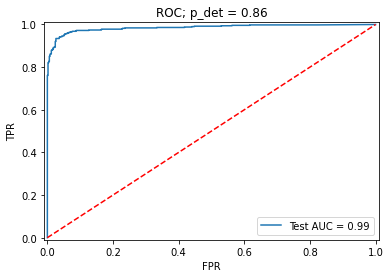

In [96]:
test_size = 1000

all_data_raw, labels, f_s, h0_s, sqrt_S_s, rho_s = generate_test_data(test_size, lower_f=20, upper_f=25, h0_lower=-20, h0_upper=-27)

detection_probability = get_results(all_data_raw, labels)

In [71]:
labels

[[1]]